# Task2

## Given data X[i, :] (create in 2-dimensions say 5 blobs by drawing data from 5 gaussians with different means and sufficiently small variance), and a desired number of clusters P (for above dataset play with P = 2, 5, 8), and a max number of iterations M . Do something like 50 datapoints per blob.

In [1]:
from collections import defaultdict
import torch
import numpy as np

means = [2,4,6,8,10]
variance = 1
X = []
for i in range(50):
    for m in means:
        X.append((np.random.normal(m, variance),np.random.normal(m, variance)))
X = np.asarray(X)
np.save('./dataset.npy', X)
X = np.load('./dataset.npy')

## Initialize cluster centers T [j, :] – for simplicity select your 5 cluster centers from X[i, :] as fixed indices.

In [2]:
fixed_indices = [0, 188]

T = []
for i in fixed_indices:
    T.append(X[i])
T = np.asarray(T)

## Visualize the data and the initial cluster centers by matplotlib

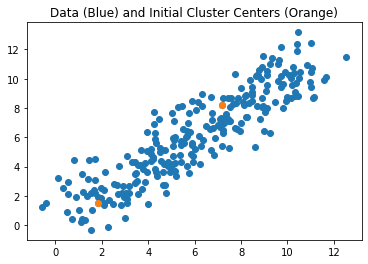

In [4]:
import matplotlib.pyplot as plt

xx = [m[0] for m in X]
yy = [m[1] for m in X]

x_mean = []
y_mean = []
for i in fixed_indices:
    x_mean.append(X[i][0])
    y_mean.append(X[i][1])

plt.scatter(xx,yy)
plt.scatter(x_mean,y_mean)
plt.title('Data (Blue) and Initial Cluster Centers (Orange)')
plt.show()

## Iterate in a for loop for at most M times

In [5]:
M = 20
threshold = 0.5

X_torch = torch.from_numpy(X)
T_torch = torch.from_numpy(T)

for i in range(M):
    nearest_center_dict = defaultdict(lambda: [])
    # compute the distance matrix ||X[i, :] − T [j, :]||^2 as per task1
    dist_matrix = ((torch.unsqueeze(X_torch,dim=1)-torch.unsqueeze(T_torch,dim=0))**2).sum(axis=2)
    # for each sample X[i, :] find the index j of the cluster rep T [j, :] which is nearest
    nearest_center = torch.argmin(dist_matrix, axis=1)
    # Now recompute T [j, :] as the mean of all those X[i, :] for which i ∈ Ind(j)
    for j in range(len(dist_matrix)):
        nearest_center_dict[int(nearest_center[j].numpy())].append(X_torch[j].numpy())
    new_T = []
    for k in sorted(nearest_center_dict.keys()):
        new_T.append(np.mean(nearest_center_dict[k],axis=0))
    # terminate if the distance between old T [j, :] and recomputed T [j, :] is for all j below a threshold
    cnt = 0
    old_T = T_torch.numpy()
    for j in range(len(fixed_indices)):
        if np.sqrt((old_T[j][0] - new_T[j][0])**2 + (old_T[j][1] - new_T[j][1])**2) < threshold:
            cnt += 1
    if cnt == len(fixed_indices):
        break
    T_torch = torch.from_numpy(np.asarray(new_T))

## Visualize the data and the converged cluster centers by matplotlib

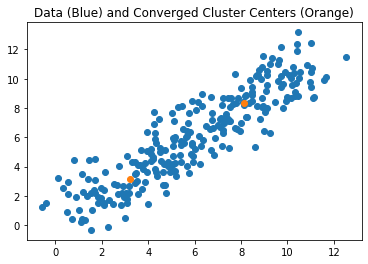

In [6]:
x_mean = []
y_mean = []
for i in new_T:
    x_mean.append(i[0])
    y_mean.append(i[1])

plt.scatter(xx,yy)
plt.scatter(x_mean,y_mean)
plt.title('Data (Blue) and Converged Cluster Centers (Orange)')
plt.show()